# Mini Projeto: Classificação com Machine Learning Usando o Heart Disease Dataset

 *Membros da Dupla:*
- Rônero Gomes Cavalcante Júnior
- Jean Felipe Duarte Tenório

## 1.Visão Geral sobre o Dataset

Este conjunto de dados extraído de **UCI Heart Disease** contém 76 atributos, mas todos os experimentos feitos com ele se baseam dados de Cleveland um subconjunto contendo 14 atributos contendo 13 features, variáveis para usarmos como base para treinar modelos de aprendizado de máquina e um target que é a instância que queremos prever,isto é, a presença ou não de doença de coração nos pacientes.

### Dicionario de Variáveis:
- **age**: Idade do paciente (anos)
- **sex**: Sexo do paciente (1 = masculino, 0 = feminino)
- - **cp**: Tipo de dor no peito (1: angina típica, 2: angina atípica, 3: dor não anginosa, 4: assintomático)
- **trestbps**: Pressão arterial em repouso (mm Hg)
- **chol**: Colesterol sérico (mg/dL)
- **fbs**: Glicemia de jejum > 120 mg/dL (1 = sim, 0 = não)
- **restecg**: Eletrocardiograma em repouso (0: normal, 1: anormalidade ST-T, 2: hipertrofia ventricular esquerda)
- **thalach**: Frequência cardíaca máxima atingida durante exercício
- **exang**: Angina induzida por exercício (1 = sim, 0 = não)
- **oldpeak**: Depressão do segmento ST induzida por exercício em relação ao repouso
- **slope**: Inclinação do segmento ST no pico do exercício (0: ascendente, 1: plano, 2: descendente)
- **ca**: Número de vasos principais (0-3) coloridos por fluoroscopia
- **thal**: Talassemia (3: normal, 6: defeito fixo, 7: defeito reversível)
- **num**: Tem doença cardíaca? 0- Não tem  1,2,3,4 tem doença cardíaca.
   ***observação: num* foi renomeado para target para facilitar na identicação do que queremos prever** 

**Principais etapas do projeto:**
1. Exploração do problema e análise inicial dos dados.
2. Pré-processamento: tratamento de valores ausentes, conversão de variáveis categóricas e padronização.
3. Divisão dos dados em treino e teste.
4. Treinamento e avaliação de modelos de classificação.
5. Discussão dos resultados e conclusões.

In [102]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV



In [ ]:
# Importando o dataset que será utilizado a partir de UCI Machine Learning Repository
heart_disease = fetch_ucirepo(id=45) 


In [120]:
descricao_features = {
    'age': 'Idade do paciente (anos)',
    'sex': 'Sexo do paciente (1 = masculino, 0 = feminino)',
    'cp': 'Tipo de dor no peito (0: angina típica, 1: angina atípica, 2: dor não anginosa, 3: assintomático)',
    'trestbps': 'Pressão arterial em repouso (mm Hg)',
    'chol': 'Colesterol sérico (mg/dL)',
    'fbs': 'Glicemia de jejum > 120 mg/dL (1 = sim, 0 = não)',
    'restecg': 'Eletrocardiograma em repouso (0: normal, 1: anormalidade ST-T, 2: hipertrofia ventricular esquerda)',
    'thalach': 'Frequência cardíaca máxima atingida durante exercício',
    'exang': 'Angina induzida por exercício (1 = sim, 0 = não)',
    'oldpeak': 'Depressão do segmento ST induzida por exercício em relação ao repouso',
    'slope': 'Inclinação do segmento ST no pico do exercício (0: ascendente, 1: plano, 2: descendente)',
    'ca': 'Número de vasos principais (0-3) coloridos por fluoroscopia',
    'thal': 'Talassemia (3: normal, 6: defeito fixo, 7: defeito reversível)',
    'target': 'Tem doença cardíaca? (1 = sim, 0 = não)' 
}
# Sobrescrevendo as descrições no DataFrame de variáveis do ucimlrepo
for col, desc in descricao_features.items():
    mask = heart_disease.variables['name'] == col
    heart_disease.variables.loc[mask, 'description'] = desc
print(heart_disease.variables[['name', 'description']])

        name                                        description
0        age                           Idade do paciente (anos)
1        sex     Sexo do paciente (1 = masculino, 0 = feminino)
2         cp  Tipo de dor no peito (0: angina típica, 1: ang...
3   trestbps                Pressão arterial em repouso (mm Hg)
4       chol                          Colesterol sérico (mg/dL)
5        fbs   Glicemia de jejum > 120 mg/dL (1 = sim, 0 = não)
6    restecg  Eletrocardiograma em repouso (0: normal, 1: an...
7    thalach  Frequência cardíaca máxima atingida durante ex...
8      exang   Angina induzida por exercício (1 = sim, 0 = não)
9    oldpeak  Depressão do segmento ST induzida por exercíci...
10     slope  Inclinação do segmento ST no pico do exercício...
11        ca  Número de vasos principais (0-3) coloridos por...
12      thal  Talassemia (3: normal, 6: defeito fixo, 7: def...
13       num                         diagnosis of heart disease


# 2. Exploração do problema e análise inicial dos dados.

Nesta etapa vamos explorar o contexto dos dados para visualizar features e targets, verificar o desbalanceamento de classes e realizar análise descritiva e visualizações iniciais.

## Sumário
- Identificar a variável-alvo (target)
- Entender as principais features (entradas)
- Verificar o desbalanceamento de classes
- Realizar análise descritiva e visualizações iniciais

In [82]:
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets

# Conferir as primeiras 5 linhas do dataset
print(X.head())
print(y.head())


# Informações gerais do dataset
print(X.info())
print(y.info())

#Renomeando num como target para facilitar a identificação
y = y.rename(columns={'num': 'target'})


# Estatísticas descritivas
print(X.describe())
print(y.describe())

# Verificando a quantidade de dados 
print("Colunas do target:", y.columns)
print("Distribuição das classes (target):")
print(y.value_counts())

# Verificando a proporção das classes no target
print("Proporção das classes:")
print(y['target'].value_counts(normalize=True))





   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
   num
0    0
1    2
2    1
3    0
4    0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

In [64]:
# Exploração inicial: verificar valores faltantes nas features e no target
print("Valores faltantes nas features:")  # 4 valores faltantes em 'ca' e 2 em 'thal'
print(X.isnull().sum())

print("\nValores faltantes no target:")
print(y.isnull().sum())

Valores faltantes nas features:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Valores faltantes no target:
target    0
dtype: int64


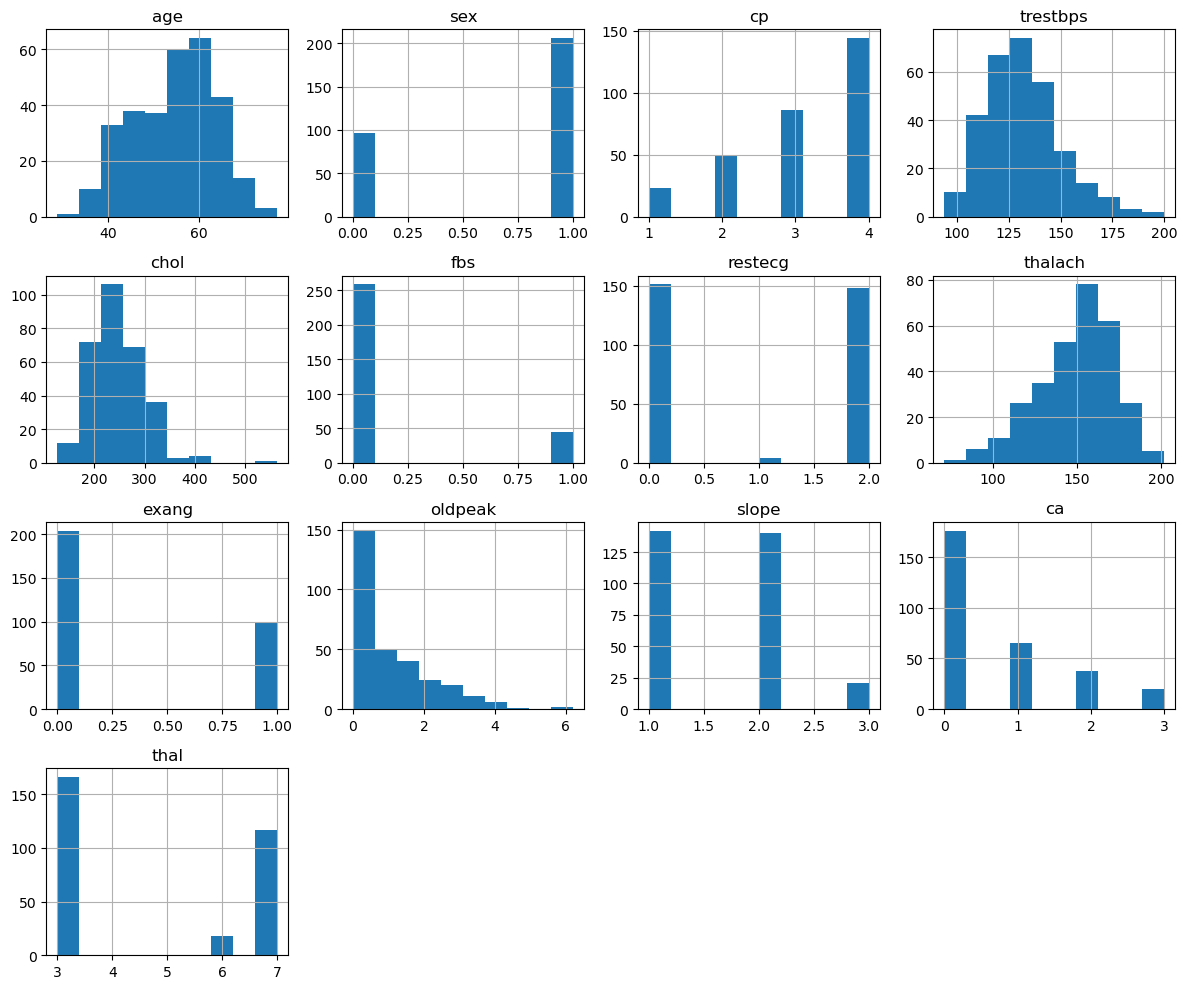

In [65]:
# Histograma das features numéricas
X.hist(figsize=(12,10))
plt.tight_layout()
plt.show()


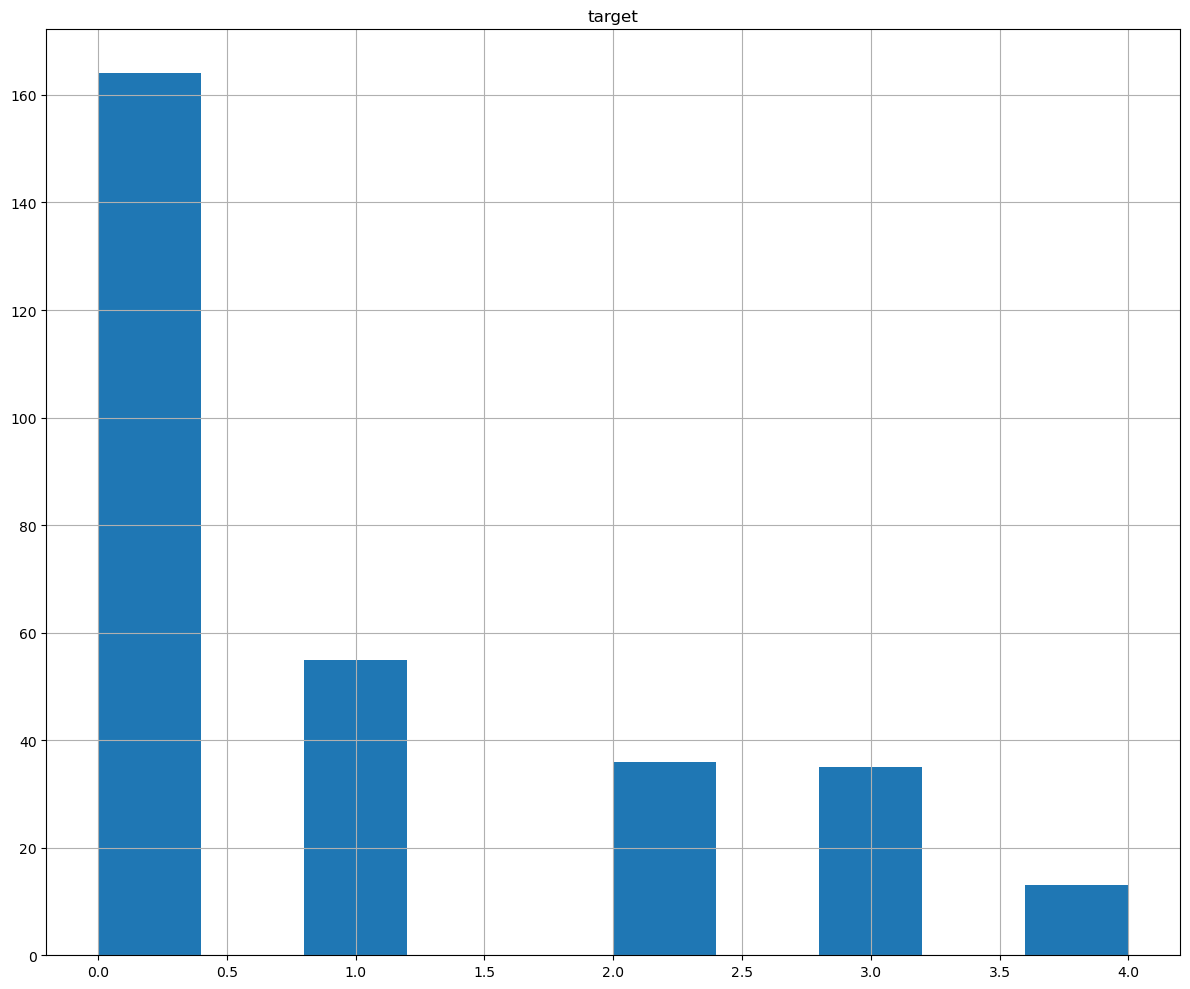

In [66]:
# Histograma de target numéricas
y.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

target      1.000000
ca          0.518909
thal        0.509923
oldpeak     0.504092
cp          0.407075
exang       0.397057
slope       0.377957
sex         0.224469
age         0.222853
restecg     0.183696
trestbps    0.157754
chol        0.070909
fbs         0.059186
thalach    -0.415040
Name: target, dtype: float64


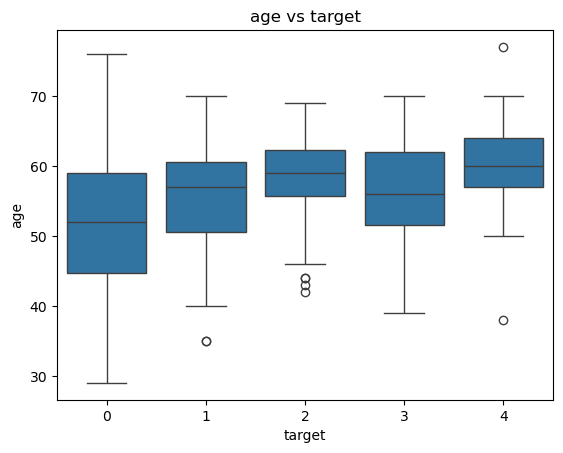

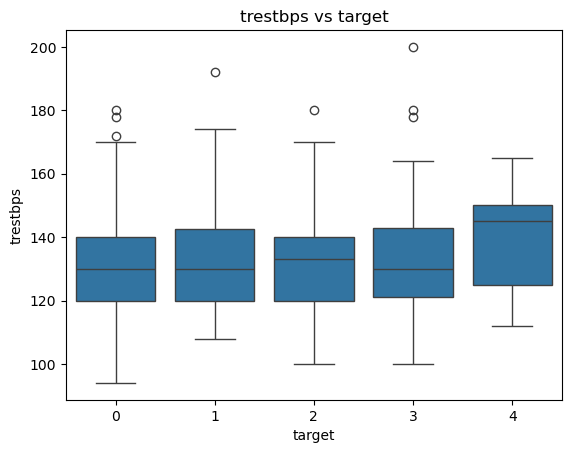

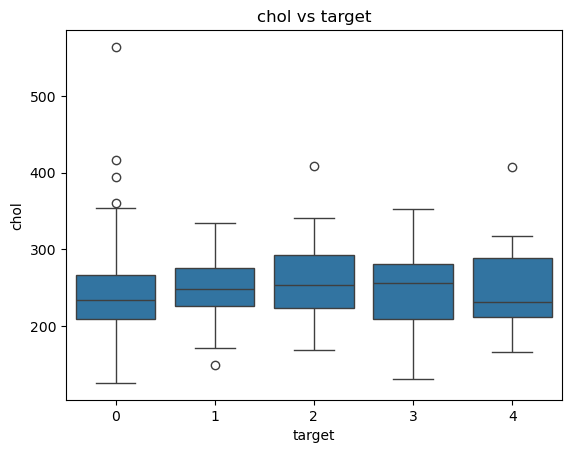

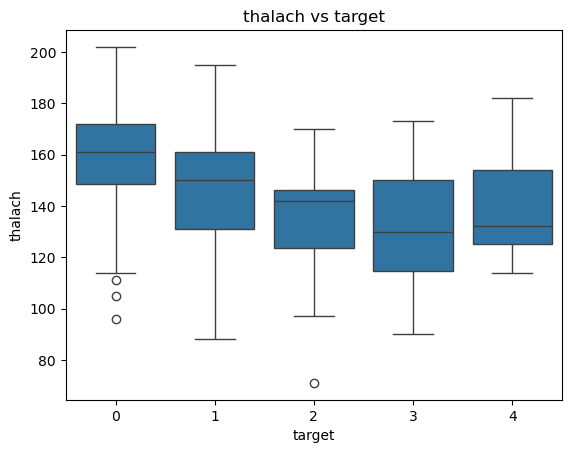

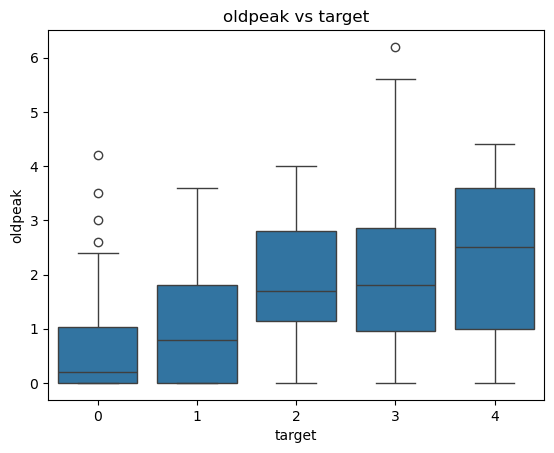

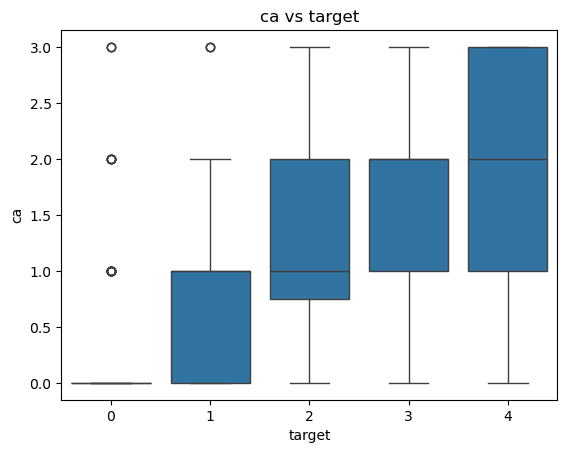

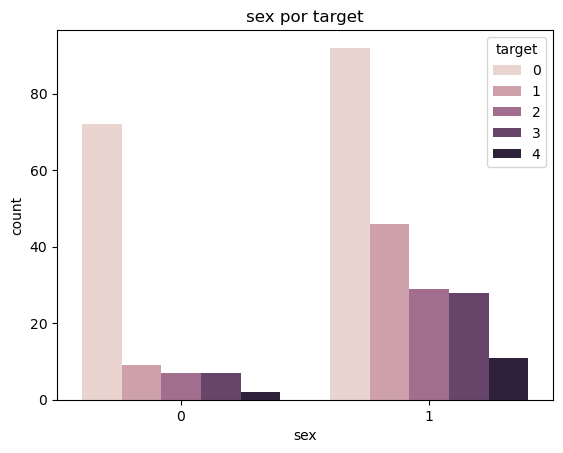

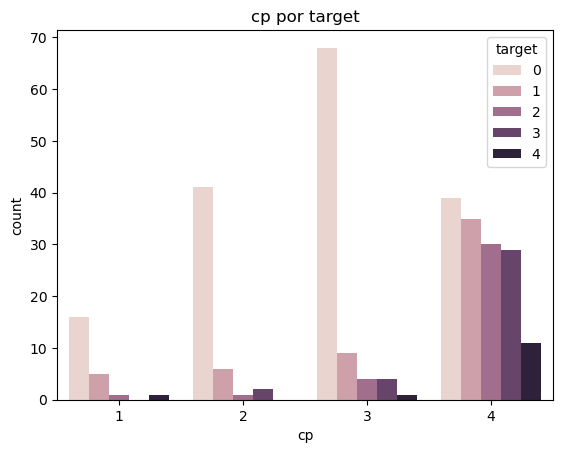

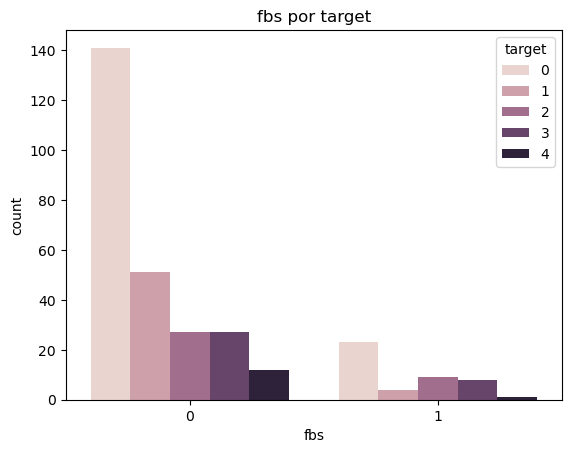

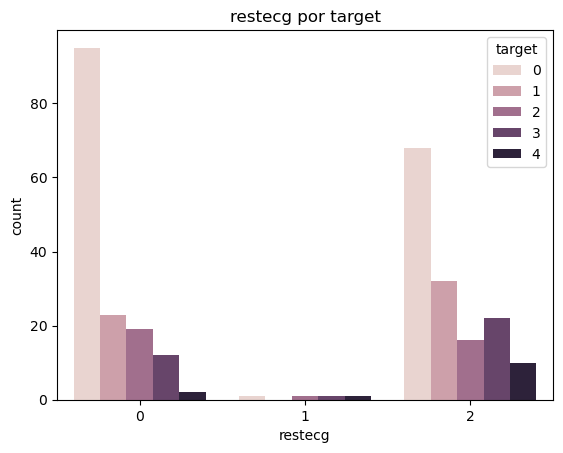

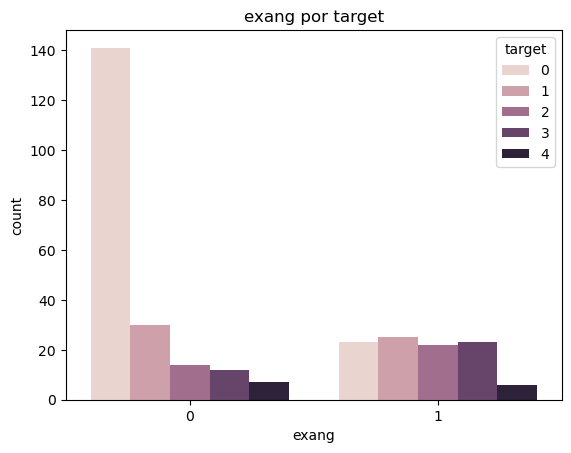

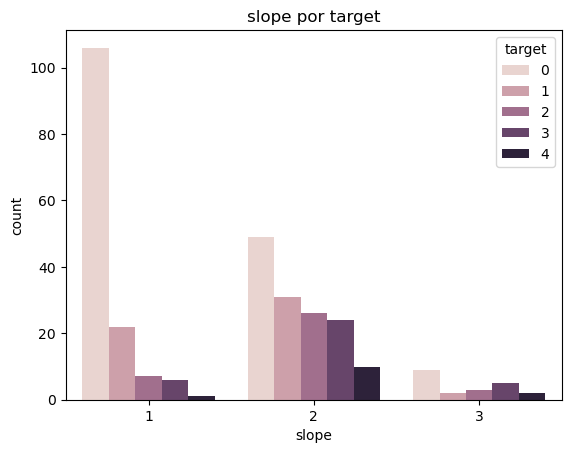

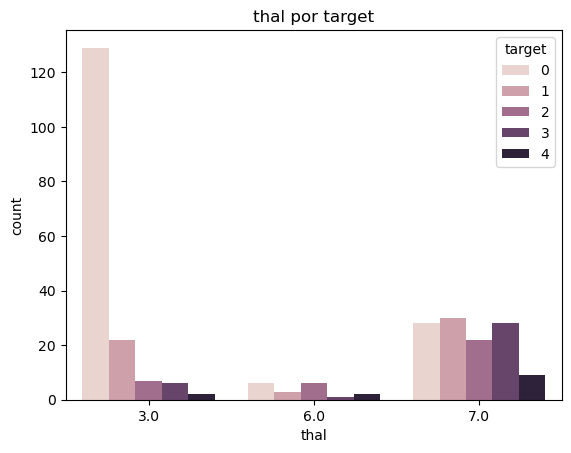

In [67]:
# Fazendo gráficos relacionando features entre si e com o target num para poder entender os dados.

df_corr = pd.concat([X, y['target']], axis=1)
print(df_corr.corr()['target'].sort_values(ascending=False))



# Boxplot para variáveis contínuas/discretas
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']:
    sns.boxplot(x='target', y=col, data=pd.concat([X, y], axis=1))
    plt.title(f'{col} vs target')
    plt.show()

# Countplot para variáveis categóricas
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
    sns.countplot(x=col, hue='target', data=pd.concat([X, y], axis=1))
    plt.title(f'{col} por target')
    plt.show()

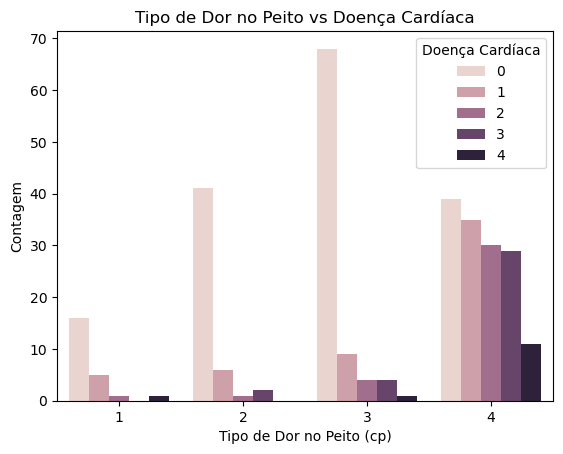

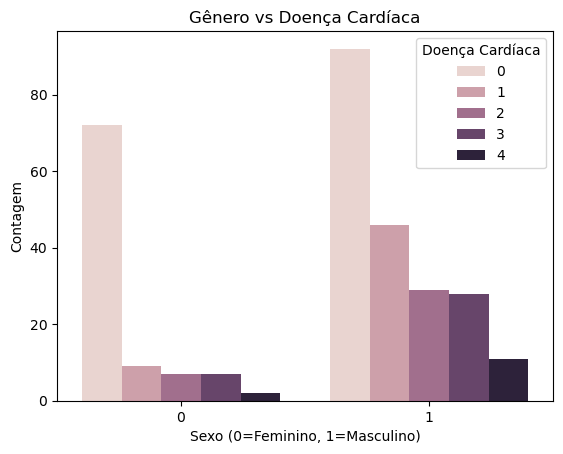

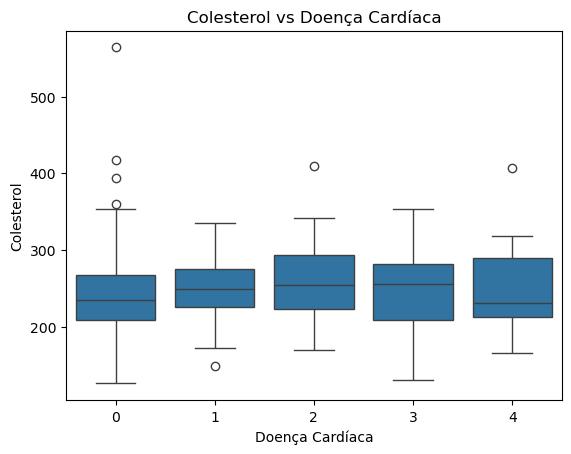

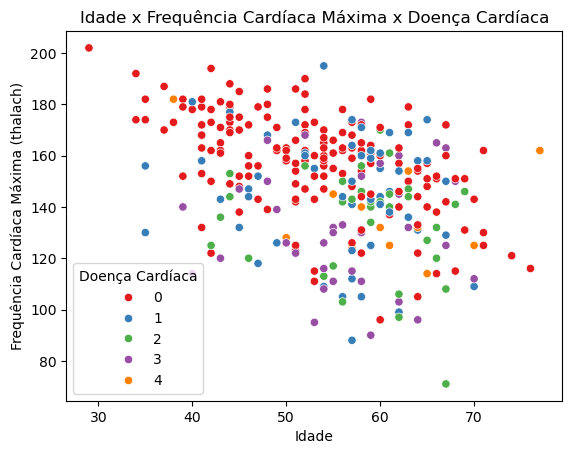

In [80]:
df_plot = pd.concat([X, y], axis=1)

# 1. Heart Disease vs Tipo de Dor no Peito (cp)
sns.countplot(x='cp', hue='target', data=df_plot)
plt.title('Tipo de Dor no Peito vs Doença Cardíaca')
plt.xlabel('Tipo de Dor no Peito (cp)')
plt.ylabel('Contagem')
plt.legend(title='Doença Cardíaca')
plt.show()

# 2. Gênero x Doença
sns.countplot(x='sex', hue='target', data=df_plot)
plt.title('Gênero vs Doença Cardíaca')
plt.xlabel('Sexo (0=Feminino, 1=Masculino)')
plt.ylabel('Contagem')
plt.legend(title='Doença Cardíaca')
plt.show()

# 3. Colesterol x Doença
sns.boxplot(x='target', y='chol', data=df_plot)
plt.title('Colesterol vs Doença Cardíaca')
plt.xlabel('Doença Cardíaca')
plt.ylabel('Colesterol')
plt.show()

# 4. Idade x Doença x Frequência Cardíaca
sns.scatterplot(x='age', y='thalach', hue='target', data=df_plot, palette='Set1')
plt.title('Idade x Frequência Cardíaca Máxima x Doença Cardíaca')
plt.xlabel('Idade')
plt.ylabel('Frequência Cardíaca Máxima (thalach)')
plt.legend(title='Doença Cardíaca')
plt.show()

### 2.1 Resultado da Análise dos Dados

#### Distribuição das Variáveis e Classes
- O dataset possui variáveis contínuas, discretas e categóricas, todas relacionadas a fatores de risco e sintomas de doença cardíaca.
- O target foi renomeado para facilitar a análise. A distribuição das classes mostra certo desbalanceamento, mas ainda permite análise e modelagem.

#### Análise das Variáveis Numéricas

- **Colesterol (chol):**  
  As medianas de colesterol para quem não tem doença são um pouco mais baixas do que para quem tem doença (targets 1, 2, 3), mas para o grupo 4 a mediana é baixa mesmo com doença. Existem muitos outliers de colesterol alto entre quem não tem doença, mostrando que colesterol isoladamente não é um bom discriminador.

- **Idade (age):**  
  A idade está bem distribuída entre 30 e 70 anos, sem um padrão claro de associação direta com a presença ou ausência de doença cardíaca.

- **Frequência Cardíaca Máxima (thalach):**  
  Apresenta correlação negativa com o target. Ou seja, quanto maior a frequência máxima atingida, menor a chance de doença cardíaca. Pacientes sem doença costumam atingir frequências mais altas.

- **Oldpeak:**  
  A mediana de oldpeak aumenta conforme a gravidade da doença, mas há muitos outliers. É uma variável relevante para diagnóstico, mas pode gerar falsos positivos se usada sozinha.

- **Pressão Arterial em Repouso (trestbps):**  
  Não apresentou grande diferença entre os grupos de doentes e não doentes.

- **ca (número de vasos principais):**  
  Valores mais altos de ca estão fortemente associados à presença de doença cardíaca. Quem não tem doença quase sempre tem ca = 0.

#### Análise das Variáveis Categóricas

- **Tipo de Dor no Peito (cp):**  
  cp = 3 (dor não anginosa) está mais associado à ausência de doença.  
  cp = 4 (assintomático) tem maior incidência de doença cardíaca, podendo gerar falsos positivos.  
  Nos outros tipos (1 e 2), a maioria também não tem doença, mas a diferença não é tão grande quanto em cp = 3.  
  A doença cardíaca aparece de forma mais uniforme entre os assintomáticos, dificultando o diagnóstico apenas por sintomas.

- **Sexo (sex):**  
  Homens são maioria no dataset e têm maior incidência de doença cardíaca, mas a diferença entre doentes e não doentes entre os homens é mais uniforme. Sexo isoladamente não é um bom discriminador.

- **Glicemia de Jejum (fbs):**  
  Tem pouca relevância, pois a maioria dos pacientes, independentemente do valor, não tem doença. A diferença entre os grupos é pequena.

- **Eletrocardiograma em Repouso (restecg):**  
  Valor 0 (normal) tem mais não doentes, mas os outros valores (1 e 2) não diferenciam bem entre doentes e não doentes.

- **Angina Induzida por Exercício (exang):**  
  exang = 0 está mais associado à ausência de doença, mas exang = 1 não diferencia bem, pois a proporção de doentes e não doentes é parecida.

- **Inclinação do Segmento ST (slope):**  
  Slope baixo (1) é mais comum em quem não tem doença. Conforme o valor de slope aumenta, a quantidade de não doentes diminui bastante, indicando que slope pode ser relevante para o diagnóstico.

- **Talassemia (thal):**  
  thal = 3 (normal) está fortemente associado à ausência de doença.  
  thal = 6 ou 7 (alterações) têm distribuição mais uniforme, indicando maior risco de doença.

#### Gráficos e Relações

- Os gráficos de dispersão e boxplots mostraram que variáveis como thalach, oldpeak, ca, cp, slope e thal têm maior poder discriminativo.
- Variáveis como colesterol, idade, fbs e restecg têm pouco poder isolado para distinguir entre doentes e não doentes.
- O gráfico de dispersão idade x thalach mostra que frequências cardíacas máximas baixas estão associadas a doença cardíaca, enquanto frequências altas são mais comuns em quem não tem doença. Idade, por outro lado, está bem distribuída e não é um bom discriminador isolado.

#### Tratamento de Valores Ausentes

- Como os valores ausentes são poucos (menos de 5%) e as variáveis são discretas/categóricas, foi decidido preencher com a moda (valor mais frequente), mantendo a distribuição dos dados.


**Conclusão:**  
A análise inicial mostrou que variáveis como thalach, oldpeak, ca, cp, slope e thal são mais relevantes para o diagnóstico de doença cardíaca, enquanto outras têm menor poder discriminativo isoladamente. O uso combinado dessas variáveis será importante para o sucesso do modelo de machine

### 3. Pré-processamento: tratamento de valores ausentes, conversão de variáveis categóricas e padronização

Nesta etapa, o objetivo é preparar os dados para que os modelos de machine learning possam aprender da melhor forma possível. O pré-processamento é fundamental para garantir que as informações estejam completas, padronizadas e no formato adequado para os algoritmos.

**Principais passos realizados:**

- **Tratamento de valores ausentes:**  
  Como identificamos que algumas variáveis (como `ca` e `thal`) possuem poucos valores ausentes e são discretas/categóricas, optamos por preencher esses valores com a moda (valor mais frequente), mantendo a distribuição original dos dados.
- **Conversão de variáveis categóricas:**  
  No caso deste dataset, as variáveis categóricas já estavam representadas por números inteiros (por exemplo, `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca` e `thal`). Por isso, não foi necessário converter essas variáveis para números, apenas garantir que fossem tratadas corretamente pelo modelo, utilizando técnicas como OneHotEncoder quando apropriado, converteremos target(original num) em binária agrupando 1 2 3 4 em 1 tendo doença e 0 como não tendo doença a fim de melhorar a previsão dos modelos.
- **Padronização das variáveis numéricas:**  
  As variáveis numéricas foram padronizadas (usando StandardScaler) para que todas fiquem na mesma escala, evitando que variáveis com valores maiores tenham mais influência no modelo.
- **Separação entre features e target:**  
  O conjunto de dados foi dividido em variáveis de entrada (X) e variável alvo (y), e posteriormente em conjuntos de treino e teste, garantindo uma avaliação justa dos modelos.
- **Não foi feito Feature Engineering**
  Nota: Não foi realizada engenharia de atributos (feature engineering) adicional, pois as variáveis originais do dataset já são bem selecionadas e informativas para o problema de classificação de doença cardíaca, posteriormente caso necessário a fim de em outro dataset ou nesse mesmo poderá ser feito para validação de experiência e hipótese de melhoria de resultados.

In [99]:
#Tratamento de valores ausentes
df = pd.concat([X, y], axis=1)
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
print("Moda de ca:", df['ca'].mode()[0])
print("Moda de thal:", df['thal'].mode()[0])

# Verificando novamente se há valores ausentes
print("Valores faltantes após tratamento:")
print(df.isnull().sum())

# Separando as features e o target
X = df.drop(columns='target')  
y = df['target']               

# Tornando target em binária
y = y.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1}) 

# Verificando a distribuição do target após transformação
print("Distribuição do target após transformação:")
print(y.value_counts())

# Separando em colunas numéricas e categóricas e uando OneHotEncoder e StandardScaler
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)



Moda de ca: 0.0
Moda de thal: 3.0
Valores faltantes após tratamento:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Distribuição do target após transformação:
target
0    164
1    139
Name: count, dtype: int64


## 4. Divisão dos dados em treino e teste

Após o pré-processamento, é fundamental separar os dados em conjuntos de treino e teste. O conjunto de treino será utilizado para ajustar os modelos de machine learning, enquanto o conjunto de teste servirá para avaliar o desempenho dos modelos em dados nunca vistos.

**Principais passos realizados:**


- **Proporção de divisão:**  
  Utilizamos a proporção de 80% dos dados para treino e 20% para teste (80/20), que é uma prática comum em projetos de machine learning. Isso garante que o modelo tenha mais dados para aprender e ainda permite uma avaliação confiável.

- **Estratificação:**  
  A função `train_test_split` do scikit-learn permite realizar a divisão de forma aleatória e estratificada, mantendo a proporção das classes da variável-alvo em ambos os conjuntos. Isso é importante quando há desbalanceamento entre as classes.

- **Aplicação do Pré-Processamento aos dados de treino**
  Será feito na divisão dos treinos o pré processamento dos testes e do treino após essa divisão para garantir o ajuste dos parâmetros sem vazamento de dados do teste para o treino.


In [ ]:
# 9. Divide os dados com estratificação
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 10. Aplica o pré-processamento
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

### 5. Treinamento e avaliação de modelos de classificação.

Nesta etapa, treinamos e avaliamos diferentes algoritmos de classificação para prever a presença de doença cardíaca. O objetivo é comparar o desempenho dos modelos e escolher o mais adequado para o problema.

**Principais passos realizados:**

- **Escolha dos modelos:**  
  Foram escolhidos pelo menos dois algoritmos de classificação: Regressão Logística e Random Forest. Outros modelos como KNN, Árvore de Decisão e SVM também podem ser testados para comparação.
  Segundo o site do dataset UCI MACHINE LEARNING REPOSITORY a análise a partir do gráfico de precisão disponibilizada, pudemos retirar as seguintes interpretações:

  - Todos os modelos apresentaram desempenho semelhante, com precisões médias entre aproximadamente 65% e 85%.
  -Random Forest e Logistic Regression tiveram as maiores precisões médias, próximas de 80% a 85%, com menor variação.

  - Support Vector Classification apresentou maior variação nos resultados, indicando que seu      desempenho pode ser mais sensível a mudanças nos dados ou nos hiperparâmetros.
  XGBoost e Neural Network também tiveram bons desempenhos, mas com intervalos de confiança um pouco maiores.

  - Conclusão:
  Modelos como Random Forest e Logistic Regression são boas escolhas para esse problema, pois apresentam alta precisão e resultados mais estáveis. Porém, é importante considerar outras métricas (como recall e F1-score) e o contexto do problema para a escolha final do modelo.

- **Treinamento dos modelos:**  
  Cada modelo foi treinado utilizando o conjunto de treino, com ajuste de hiperparâmetros quando necessário para otimizar o desempenho.

- **Avaliação dos modelos:**  
  Os modelos foram avaliados no conjunto de teste utilizando as seguintes métricas:
  - **Acurácia:** Proporção de previsões corretas.
  - **Precisão:** Entre as previsões positivas, quantas estavam corretas.
  - **Recall (Sensibilidade):** Entre os casos positivos reais, quantos foram identificados corretamente.
  - **F1-score:** Média harmônica entre precisão e recall.
  - **Matriz de confusão:** Mostra os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

- **Visualização dos resultados:**  
  Foram gerados gráficos de barras para comparar as métricas entre os modelos e heatmaps para visualizar a matriz de confusão.

- **Validação cruzada:**  
  Utilizamos validação cruzada (`cross_val_score`) para garantir que os resultados sejam consistentes em diferentes partições dos dados.


Regressão Logística:
Acurácia: 0.85
Matriz de Confusão:
[[27  6]
 [ 3 25]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.81      0.89      0.85        28

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61


Random Forest:
Acurácia: 0.90
Matriz de Confusão:
[[29  4]
 [ 2 26]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



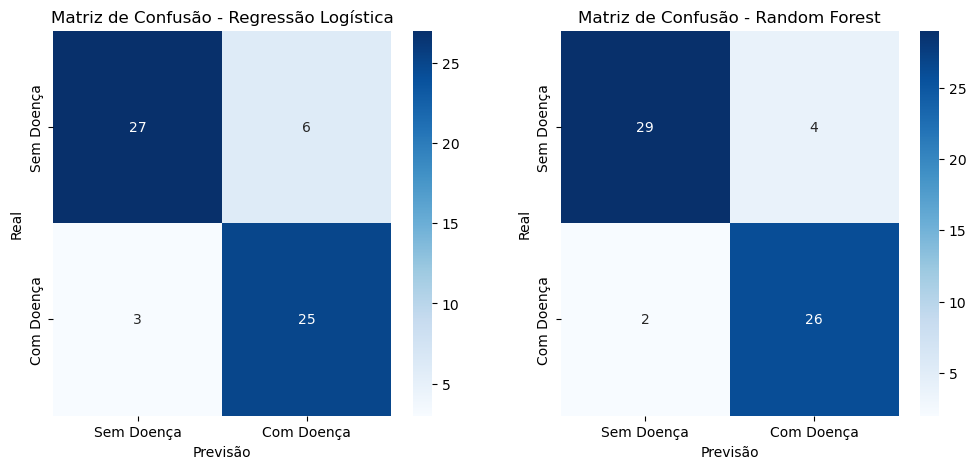

In [119]:
# Treino dos Modelos
# Treino do Modelo de Regressão Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
# Treino do Modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Previsão dos Modelos
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Avaliação dos Modelos
# Avaliação do Modelo de Regressão Logística
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_confusion = confusion_matrix(y_test, y_pred_logistic)
logistic_report = classification_report(y_test, y_pred_logistic)

print("Regressão Logística:")
print(f"Acurácia: {logistic_accuracy:.2f}")
print("Matriz de Confusão:")
print(logistic_confusion)
print("Relatório de Classificação:")
print(logistic_report)

# Avaliação do Modelo de Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_confusion = confusion_matrix(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print("\nRandom Forest:")
print(f"Acurácia: {rf_accuracy:.2f}")
print("Matriz de Confusão:")
print(rf_confusion)
print("Relatório de Classificação:")
print(rf_report)


#  Visualização da Matriz de Confusão com HeatMap
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.heatmap(logistic_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Doença', 'Com Doença'], yticklabels=['Sem Doença', 'Com Doença'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsão')
plt.ylabel('Real')

plt.subplot(1,2,2)
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Doença', 'Com Doença'], yticklabels=['Sem Doença', 'Com Doença'])
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

scores_log = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')
scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')



Regressão Logística (Ajustada):
Acurácia: 0.87
Matriz de Confusão:
[[28  5]
 [ 3 25]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Random Forest (Ajustada):
Acurácia: 0.90
Matriz de Confusão:
[[29  4]
 [ 2 26]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



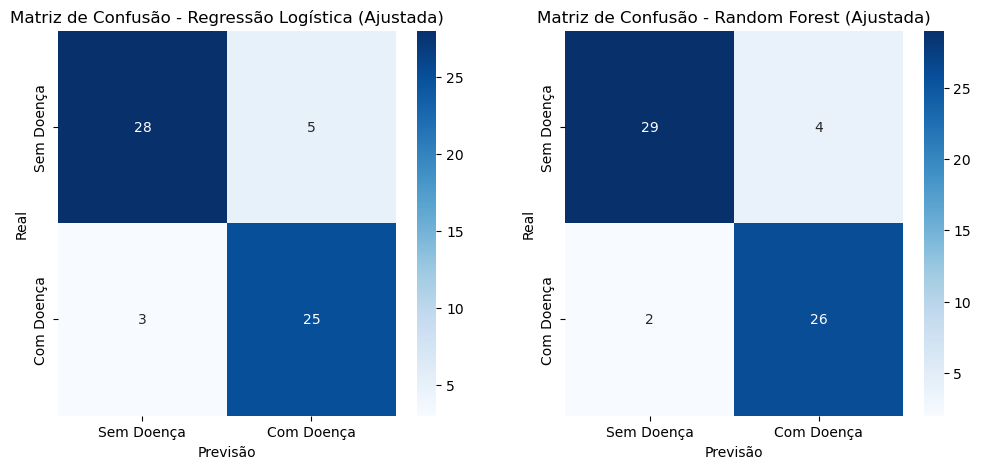

In [108]:

# Com ajuste de hiperparâmetros com GridSearchCV

# Regressão Logística
param_grid = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
melhor_modelo = grid.best_estimator_
y_pred_logistic_best = melhor_modelo.predict(X_test)
print("Regressão Logística (Ajustada):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_logistic_best):.2f}")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_logistic_best))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_logistic_best))

# Random Forest
param_grid2 = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid2, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
rf_model_best = grid_rf.best_estimator_
y_pred_rf_best = rf_model_best.predict(X_test)
print("\nRandom Forest (Ajustada):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf_best):.2f}")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf_best))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf_best))



plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_logistic_best), annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Doença', 'Com Doença'], yticklabels=['Sem Doença', 'Com Doença'])
plt.title('Matriz de Confusão - Regressão Logística (Ajustada)')
plt.xlabel('Previsão')
plt.ylabel('Real')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf_best), annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Doença', 'Com Doença'], yticklabels=['Sem Doença', 'Com Doença'])
plt.title('Matriz de Confusão - Random Forest (Ajustada)')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

Regressão Logística (Ajustada):
Acurácia: 0.87
Matriz de Confusão:
[[28  5]
 [ 3 25]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Random Forest (Ajustada):
Acurácia: 0.90
Matriz de Confusão:
[[29  4]
 [ 2 26]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



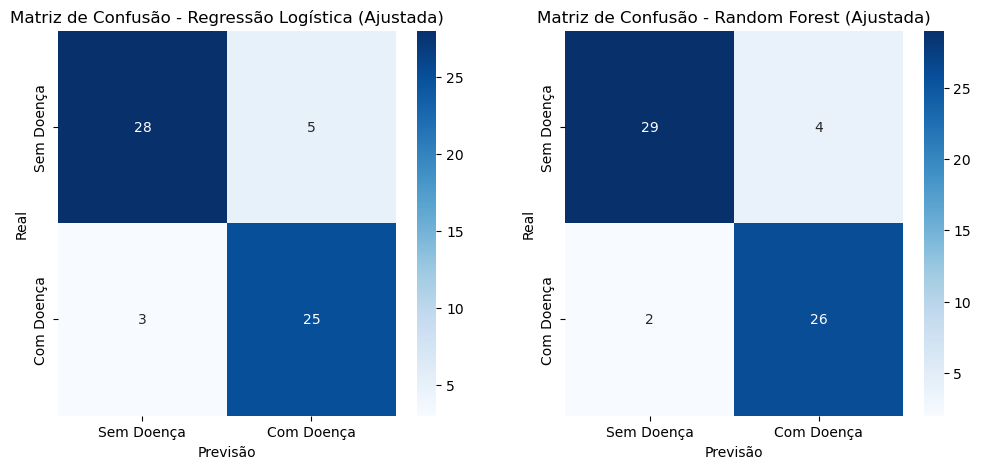

In [117]:

# Com ajuste de hiperparâmetros com GridSearchCV

# Regressão Logística
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
    'max_iter': [1000, 5000]
}
grid = GridSearchCV(LogisticRegression(max_iter=20000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
melhor_modelo = grid.best_estimator_
y_pred_logistic_best = melhor_modelo.predict(X_test)
print("Regressão Logística (Ajustada):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_logistic_best):.2f}")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_logistic_best))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_logistic_best))

# Random Forest
param_grid2 = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini']
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid2, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
rf_model_best = grid_rf.best_estimator_
y_pred_rf_best = rf_model_best.predict(X_test)
print("\nRandom Forest (Ajustada):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf_best):.2f}")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf_best))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf_best))



plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_logistic_best), annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Doença', 'Com Doença'], yticklabels=['Sem Doença', 'Com Doença'])
plt.title('Matriz de Confusão - Regressão Logística (Ajustada)')
plt.xlabel('Previsão')
plt.ylabel('Real')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf_best), annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Doença', 'Com Doença'], yticklabels=['Sem Doença', 'Com Doença'])
plt.title('Matriz de Confusão - Random Forest (Ajustada)')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

In [185]:

nova_entrada = pd.DataFrame([{
    'age': 35,
    'sex': 1,
    'cp': 4,
    'trestbps': 150,
    'chol': 220,
    'fbs': 0,
    'restecg': 1,
    'thalach': 120.0,
    'exang': 0,
    'oldpeak': 0.5,
    'slope': 2,
    'ca': 3,
    'thal': 3
}])

# Pré-processamento igual ao dos dados de treino
nova_entrada_proc = preprocessor.transform(nova_entrada)

# Modelos normais
pred_logistic = logistic_model.predict(nova_entrada_proc)
pred_rf = rf_model.predict(nova_entrada_proc)

# Modelos ajustados
pred_logistic_best = melhor_modelo.predict(nova_entrada_proc)
pred_rf_best = rf_model_best.predict(nova_entrada_proc)

print("Regressão Logística (Normal):", "Com Doença" if pred_logistic[0] == 1 else "Sem Doença")
print("Random Forest (Normal):", "Com Doença" if pred_rf[0] == 1 else "Sem Doença")
print("Regressão Logística (Ajustada):", "Com Doença" if pred_logistic_best[0] == 1 else "Sem Doença")
print("Random Forest (Ajustada):", "Com Doença" if pred_rf_best[0] == 1 else "Sem Doença")
# Para Random Forest ajustado
importances = rf_model_best.feature_importances_
print(importances)


Regressão Logística (Normal): Com Doença
Random Forest (Normal): Com Doença
Regressão Logística (Ajustada): Com Doença
Random Forest (Ajustada): Com Doença
[0.06328983 0.04972744 0.05411153 0.10122133 0.09715064 0.13572625
 0.04427591 0.01574428 0.02203228 0.11952183 0.00708637 0.00035368
 0.01525981 0.05652285 0.03804738 0.00440347 0.00691783 0.16860731]


# Conclusões

## Desempenho do Modelo
Foram testados dois modelos principais: **Regressão Logística** e **Random Forest**, avaliados em três etapas: sem ajuste de hiperparâmetros e após dois ciclos de ajuste (GridSearchCV) com uso de hiperparametros arbitrários tentando melhorar o desempenho dos modelos.

- **Sem ajuste:** Ambos os modelos apresentaram bom desempenho, mas o Random Forest já se destacou com menos erros (acurácia e F1-score levemente superiores).
- **Com ajustes:** Após os ajustes, ambos melhoraram levemente, mas o Random Forest manteve a liderança, apresentando a maior acurácia, recall e F1-score. No último ajuste, Random Forest teve apenas 4 falsos positivos e 2 falsos negativos, enquanto a Regressão Logística teve 5 e 3, respectivamente.
- **Conclusão:** O **Random Forest ajustado** foi o melhor modelo, mostrando maior capacidade de generalização e menor risco de erro crítico (especialmente para identificar corretamente pacientes com doença).

## Maiores Desafios
- **Tratamento de dados ausentes:** Algumas variáveis tinham poucos valores faltantes, resolvidos com imputação pela moda. Isso garantiu a integridade dos dados sem distorcer a distribuição.
- **Desbalanceamento de classes:** O target apresentava leve desbalanceamento, mas foi possível manter a proporção usando estratificação na divisão treino/teste.
- **Escolha de features:** A análise exploratória foi essencial para identificar as variáveis mais relevantes (ex: thalach, oldpeak, ca, cp, slope, thal).
- **Ajuste de hiperparâmetros:** Demandou tempo computacional, mas foi fundamental para extrair o melhor desempenho dos modelos.

## Generalização e Overfitting
- Não foram observados sinais claros de overfitting: os resultados no teste foram próximos aos de validação cruzada.
- Foi utilizada **validação cruzada (cross_val_score)** para garantir que os resultados fossem consistentes e robustos, evitando conclusões baseadas em uma única divisão dos dados.

## Insights do Dataset
- **Variáveis mais influentes:** thalach (frequência cardíaca máxima), oldpeak, ca (vasos principais), cp (tipo de dor no peito), slope e thal foram as mais relevantes para o diagnóstico.
- **Gráficos:** As matrizes de confusão mostraram que o Random Forest errou menos em ambas as classes. Boxplots e countplots reforçaram a importância das variáveis citadas.
- **Padrões:** Pacientes com valores altos de ca, oldpeak e certos tipos de cp/slope/thal têm maior risco de doença cardíaca.

## Principais Aprendizados
- Aprendemos a importância do pré-processamento, da análise exploratória e do ajuste de hiperparâmetros para melhorar modelos de machine learning.
- O uso de validação cruzada e análise de métricas além da acurácia (como recall e F1-score) é fundamental para avaliar modelos em problemas de saúde.
- O trabalho em equipe foi essencial para dividir tarefas, discutir decisões e validar hipóteses, tornando o processo mais eficiente e